In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder,StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [2]:
data=pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
data.columns,data.shape

(Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
        'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
        'smoking_status', 'stroke'],
       dtype='object'),
 (5110, 12))

In [4]:
## EDA 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
data.isnull().sum()/data.isnull().count()

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  0.039335
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [7]:
data=data.fillna(data['bmi'].mean())
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

<AxesSubplot:xlabel='stroke', ylabel='count'>

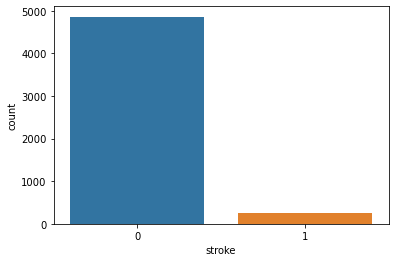

In [8]:

sns.countplot(x='stroke',data=data)

#### Preprocessing

In [9]:
## Preprocessing

#feature selection
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [10]:
df=data[['gender','age','hypertension','heart_disease','ever_married',
       'work_type','avg_glucose_level','bmi',
       'smoking_status', 'stroke']]
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,174.12,24.000000,never smoked,1


In [11]:
## labelencoding 

la=LabelEncoder()

df.loc[:,['gender','ever_married','work_type','smoking_status']]=\
df.loc[:,['gender','ever_married','work_type','smoking_status']].apply(la.fit_transform)

In [12]:
df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
5105,0,80.0,1,0,1,2,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,166.29,25.600000,1,0
5109,0,44.0,0,0,1,0,85.28,26.200000,0,0


In [13]:
map={l: i for i,l in enumerate(la.classes_)}
map 

{'Unknown': 0, 'formerly smoked': 1, 'never smoked': 2, 'smokes': 3}

In [14]:
df.work_type.unique()

array([2, 3, 0, 4, 1])

In [15]:
## HAndling imbalanced data using SMOTE

##split into x,y

x=df.drop(['stroke'],axis=1)

y=df['stroke']


### SMOTE

sm=SMOTE()
x,y=sm.fit_resample(x,y)

x.shape,y.shape

((9722, 9), (9722,))

In [16]:
## split training and test set

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_train.shape,y_train.shape

((7777, 9), (7777,))

In [17]:
#scaling training data testing

# scale=StandardScaler()
# xtrain=scale.fit_transform(x_train)
# xtest=scale.fit_transform(x_test)



In [18]:
## model creation

#LOGISTIC REGRESSION

log=LogisticRegression(random_state=0)
log.fit(x_train,y_train)
log_pred=log.predict(x_test)

In [19]:
# model evaluation

print("R2score:",r2_score(y_test,log_pred))
print("Mean sqare error:",mean_squared_error(y_test,log_pred))

from sklearn.metrics import accuracy_score,f1_score

print("Accuracy:",accuracy_score(y_test,log_pred))
print('F1_score:',f1_score(y_test,log_pred))

R2score: 0.21645223503736688
Mean sqare error: 0.19588688946015423
Accuracy: 0.8041131105398458
F1_score: 0.8074785245073268


In [20]:
## RANDOMFOREST CLASSIIER

rf_model=RandomForestClassifier(max_depth=10,n_estimators=30,random_state=0)
rf_model.fit(x_train,y_train)

rf_pred=rf_model.predict(x_test)


### Model Evaluation

In [21]:
# model evaluation

print("R2score:",r2_score(y_test,rf_pred))
print("Mean sqare error:",mean_squared_error(y_test,rf_pred))

from sklearn.metrics import accuracy_score,f1_score

print("Accuracy:",accuracy_score(y_test,rf_pred))
print('F1_score:',f1_score(y_test,rf_pred))

R2score: 0.6359896210016114
Mean sqare error: 0.0910025706940874
Accuracy: 0.9089974293059125
F1_score: 0.9122459097669806


## Export trained data

In [22]:
import joblib

joblib.dump(rf_model,'heart_stroke_prediction.ml')


['heart_stroke_prediction.ml']

In [23]:
##load model

rf_model=joblib.load('heart_stroke_prediction.ml')
rf_model



RandomForestClassifier(max_depth=10, n_estimators=30, random_state=0)

In [24]:
x.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'avg_glucose_level', 'bmi', 'smoking_status'],
      dtype='object')

In [25]:
stroke_pred=log.predict([[1,27,1,1,1,1,85,40,1]])
stroke_pred

array([0])